In [4]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "Docs/Physical_Activity_1.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

118


In [5]:
docs

[Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 0}, page_content='Physical Activity \nGuidelines for Americans \n2nd edition'),
 Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 1}, page_content='MESSAGE FROM THE SECRETARY\nRegular physical activity is one of the most important things people can do to improve their health. Moving \nmore and sitting less have tremendous benefits for everyone, regardless of age, sex, race, ethnicity, or current \nfitness level. Individuals with a chronic disease or a disability benefit from regular physical activity, as do \nwomen who are pregnant. The scientific evidence continues to build—physical activity is linked with even more \npositive health outcomes than we previously thought. And, even better, benefits can start accumulating with \nsmall amounts of, and immediately after doing, physical activity. \nToday, about half of all American adults—117 million people—have one or more preventable chronic diseases

In [9]:
print(docs[19].page_content)

20      Physical Activity Guidelines for Americans
Timing of Benefits 
A single session of moderate-to-vigorous physical activity can reduce blood pressure, improve insulin 
sensitivity, improve sleep, reduce anxiety symptoms, and improve some aspects of cognition on the day that it 
is performed. Most of these improvements become even larger with the regular performance of moderate-to-
vigorous physical activity. Other benefits, such as disease risk reduction and improved physical function, accrue 
within days to weeks after consistently being more physically active. 
Physical Activity Intensity 
The Guidelines consider the intensity with which people do physical activity. Some activities are a higher 
intensity than others because they require more energy to do. For example, a person expends more energy 
walking briskly than slowly strolling. 
Absolute rates of energy expenditure during physical activity are commonly described as light, moderate, or 
vigorous intensity
. Energy expen

### Splitting

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

376

In [11]:
all_splits

[Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 0, 'start_index': 0}, page_content='Physical Activity \nGuidelines for Americans \n2nd edition'),
 Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 1, 'start_index': 0}, page_content='MESSAGE FROM THE SECRETARY\nRegular physical activity is one of the most important things people can do to improve their health. Moving \nmore and sitting less have tremendous benefits for everyone, regardless of age, sex, race, ethnicity, or current \nfitness level. Individuals with a chronic disease or a disability benefit from regular physical activity, as do \nwomen who are pregnant. The scientific evidence continues to build—physical activity is linked with even more \npositive health outcomes than we previously thought. And, even better, benefits can start accumulating with \nsmall amounts of, and immediately after doing, physical activity. \nToday, about half of all American adults—117 million people—have one 

### Azure Embeddings

In [ ]:
from langchain_openai import AzureOpenAIEmbeddings

AZURE_OPENAI_ENDPOINT="https://iz-genai-polarion-openai.openai.azure.com/"
AZURE_OPENAI_API_KEY="a5ccb766e8e440a1a06bb963ae5b7d98"
AZURE_DEPLOYMENT_NAME="text-embedding-3-small"
AZURE_API_VERSION="2024-02-15-preview"

import os

if "AZURE_OPENAI_API_KEY" not in os.environ:
    os.environ["AZURE_OPENAI_API_KEY"] = AZURE_OPENAI_API_KEY

os.environ["AZURE_OPENAI_ENDPOINT"] = AZURE_OPENAI_ENDPOINT

azure_embeddings = AzureOpenAIEmbeddings(
    azure_endpoint= AZURE_OPENAI_ENDPOINT,
    azure_deployment= AZURE_DEPLOYMENT_NAME,
    openai_api_version= AZURE_API_VERSION
)

In [17]:
vector_1 = azure_embeddings.embed_query(all_splits[1].page_content)
vector_2 = azure_embeddings.embed_query(all_splits[2].page_content)

assert len(vector_1) == len(vector_2)

In [18]:
print(f"Generated vectors of length {len(vector_1)}\n")
print(vector_1[:10])

Generated vectors of length 1536

[0.03481597453355789, 0.014693215489387512, 0.051361922174692154, 0.09515851736068726, 0.04793951287865639, 0.04618970677256584, 0.013612453825771809, 0.017639579251408577, 0.00019751647778321058, 0.015735378488898277]


### Initiating VectorStore

In [26]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index = faiss.IndexFlatL2(len(azure_embeddings.embed_query("hello world")))

vector_store = FAISS(
    embedding_function=azure_embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [27]:
vector_store.add_documents(documents=all_splits)

['3995b23f-f1e9-407c-a5e3-d36e905f75cc',
 'bd7fd02b-6e6c-40e3-83b0-2c11f7276a83',
 'd2c43894-31fd-485f-ba8e-69b3ceec971d',
 'd470336f-b100-4980-ad9e-36ba6b22352b',
 '8bb0d49e-ae86-4579-bb9a-f79c16baaa39',
 '68b217d3-9636-4d78-b1e4-5468ce83e53d',
 'cfb09c99-9243-4e73-93cc-722eaf858096',
 'e8f40151-7b93-4156-8a88-5513d7bdaec7',
 'b70ccb76-5bfa-4497-9144-151eb6a9e827',
 'eb70bed6-f7e9-4072-abcf-8e748735e880',
 'ff5d51b5-9a6d-49d2-a1ed-4b0f06f75803',
 'f5380015-5f67-4ecf-9793-6de8658600b0',
 '28f82b2e-2ac4-4abc-adf8-294db95b2047',
 'afc5cc3b-8c29-4e84-ac2b-1421781f13d3',
 '2fe0e071-ac6e-44ec-8214-9ed2db28aba1',
 '5b3a5c71-33cd-4dba-a62b-4fb375f22ee4',
 '059bf156-6770-4bef-9057-7a594ac4d032',
 'e11a65c5-b6f6-4782-82d0-5fb0af78a27f',
 '9936a692-1ee1-49db-8e26-54a570835660',
 '9bdfdc91-f337-4abf-abde-bf269b8a1780',
 '0102fcec-c0d3-4594-bc95-b11b76401bb5',
 'd3f64b91-e30a-4a7c-b63b-5bcf9b2f89d8',
 '798bbe01-9a7c-4415-b04b-b4baeb3aae20',
 'ea62da3c-e1de-4bf5-8d91-00b446a67453',
 '21a4f5e2-9014-

### Save and Load

In [ ]:
# vector_store.save_local("faiss_index_physical_activity")

# # new_vector_store = FAISS.load_local(
# #     "faiss_index", embeddings, allow_dangerous_deserialization=True
# # )

# # docs = new_vector_store.similarity_search("qux")

Restart Point

In [1]:
AZURE_OPENAI_ENDPOINT="https://iz-genai-polarion-openai.openai.azure.com/"
AZURE_OPENAI_API_KEY="a5ccb766e8e440a1a06bb963ae5b7d98"
AZURE_DEPLOYMENT_NAME="gpt-4o-mini"
AZURE_API_VERSION="2024-02-15-preview"

import os

if "AZURE_OPENAI_API_KEY" not in os.environ:
    os.environ["AZURE_OPENAI_API_KEY"] = AZURE_OPENAI_API_KEY

os.environ["AZURE_OPENAI_ENDPOINT"] = AZURE_OPENAI_ENDPOINT

from langchain_openai import AzureChatOpenAI
from langchain_community.vectorstores import FAISS
from langchain_openai import AzureOpenAIEmbeddings


llm = AzureChatOpenAI(
    azure_deployment= AZURE_DEPLOYMENT_NAME,  # or your deployment
    api_version= AZURE_API_VERSION,  # or your api version
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)



azure_embeddings = AzureOpenAIEmbeddings(
    azure_endpoint= AZURE_OPENAI_ENDPOINT,
    azure_deployment= "text-embedding-3-small",
    openai_api_version= AZURE_API_VERSION
)
vector_store = FAISS.load_local(
    "faiss_index_physical_activity", azure_embeddings, allow_dangerous_deserialization=True
)

In [11]:
retriever = vector_store.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 2},
)

retriever.batch(
    [
        "Women During Pregnancy and the Postpartum Period",
        "Risks of Sedentary Behavior",
    ],
)

[[Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 8, 'start_index': 749}, page_content='of chronic conditions, they should be as phy\nsically active as their abilities and conditions allow. \nKey Guidelines for Women During Pregnancy and the \nPostpartum Period\n  •  Women should do at least 150 minutes (2 hours and 30 minutes) of moderate-intensity aerobic \nactivity a week during pregnancy and the pos\ntpartum period. Preferably, aerobic activity should \nbe spread throughout the week. \n  •  Women who habitually engaged in vigorous-intensity aerobic activity or who were physically \nactive before pr\negnancy can continue these activities during pregnancy and the postpartum \nperiod.\n  •  Women who are pregnant should be under the care of a health care provider who can monitor the \nprogress of the pregnancy\n. Women who are pregnant can consult their health care provider about \nwhether or how to adjust their physical activity during pregnancy and after the bab

In [ ]:
''' Prompt:

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer: 
'''

In [2]:
from langchain import hub
from langchain_core.documents import Document
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

# Define prompt for question-answering
prompt = hub.pull("rlm/rag-prompt")

# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


# Define application steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

d:\Softwares\Anaconda_downloaded\New folder\envs\Azure_Start\Lib\site-packages\langsmith\client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
que = "How Much Total Activity a Week? Give detailed answer"
response = graph.invoke({"question": que})
print(response["answer"])
# Response is Dict of values of all variables

Older adults should aim for at least 150 to 300 minutes of moderate-intensity or 75 to 150 minutes of vigorous-intensity physical activity each week, ideally spread across at least three days. Engaging in both types of activity can also count towards these guidelines. More physical activity can lead to greater health benefits and reduced risks of age-related functional decline.


In [5]:
response

{'question': 'How Much Total Activity a Week? Give detailed answer',
 'context': [Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 68, 'start_index': 1723}, page_content='How Much Total Activity a Week? \nOlder adults should aim to do at least 150 to 300 minutes of moderate-intensity physical activity a week, or an \nequivalent amount (75 to 150 minutes) of vigorous-intensity activity. They can also do an equivalent amount of \nactivity by doing both moderate- and vigorous-intensity activity. As is true for people of all other ages, greater \namounts of physical activity provide additional and more extensive health benefits. Older adults who do \nmore aerobic physical activity have a reduced risk of age-related loss of function and reduced risk of physical \nfunction limitations compared to the general aging population.'),
  Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 70, 'start_index': 0}, page_content='Chapter 5. Active Older Adults      7

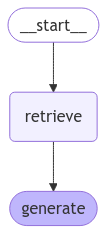

In [3]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
print(f'Length of Context: {len(response["context"])}')
print(f'Context: {response["context"]}\n\n')
print(f'Answer: {response["answer"]}')

Length of Context: 4
Context: [Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 68, 'start_index': 1723}, page_content='How Much Total Activity a Week? \nOlder adults should aim to do at least 150 to 300 minutes of moderate-intensity physical activity a week, or an \nequivalent amount (75 to 150 minutes) of vigorous-intensity activity. They can also do an equivalent amount of \nactivity by doing both moderate- and vigorous-intensity activity. As is true for people of all other ages, greater \namounts of physical activity provide additional and more extensive health benefits. Older adults who do \nmore aerobic physical activity have a reduced risk of age-related loss of function and reduced risk of physical \nfunction limitations compared to the general aging population.'), Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 70, 'start_index': 0}, page_content='Chapter 5. Active Older Adults      71     \nHow Many Days a Week and for How Long? \nAero

### Streaming Steps

In [20]:
for step in graph.stream(
    {"question": que}, stream_mode="updates"
):
    print(type(step))
    print(f"{step =  }\n\n----------------\n")

<class 'langgraph.pregel.io.AddableUpdatesDict'>
step =  {'retrieve': {'context': [Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 68, 'start_index': 1723}, page_content='How Much Total Activity a Week? \nOlder adults should aim to do at least 150 to 300 minutes of moderate-intensity physical activity a week, or an \nequivalent amount (75 to 150 minutes) of vigorous-intensity activity. They can also do an equivalent amount of \nactivity by doing both moderate- and vigorous-intensity activity. As is true for people of all other ages, greater \namounts of physical activity provide additional and more extensive health benefits. Older adults who do \nmore aerobic physical activity have a reduced risk of age-related loss of function and reduced risk of physical \nfunction limitations compared to the general aging population.'), Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 70, 'start_index': 0}, page_content='Chapter 5. Active Older Adults      71

In [6]:
count = 0
for message, metadata in graph.stream({"question": que}, stream_mode="messages"):
    while count < 15:
        print(f"{type(message) = }")
        print(f"{message = }")
        print(f"{metadata = }")
        print()
        count += 1

    print(message.content, end="||")

''' 
type(message) = <class 'langchain_core.messages.ai.AIMessageChunk'>
message = AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run-ee691b06-8a5a-4198-8d2e-0f79d36ec88b')
metadata = {'langgraph_step': 2, 'langgraph_node': 'generate', 'langgraph_triggers': ['retrieve'], 'langgraph_path': ('__pregel_pull', 'generate'), 'langgraph_checkpoint_ns': 'generate:17a7d939-ff71-42d3-5071-3a56b164e34b', 'checkpoint_ns': 'generate:17a7d939-ff71-42d3-5071-3a56b164e34b', 'ls_provider': 'azure', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}
'''

type(message) = <class 'langchain_core.messages.ai.AIMessageChunk'>
message = AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run-dfdcebfd-7f5f-4ef1-9737-c5f1d055c366')
metadata = {'langgraph_step': 2, 'langgraph_node': 'generate', 'langgraph_triggers': ['retrieve'], 'langgraph_path': ('__pregel_pull', 'generate'), 'langgraph_checkpoint_ns': 'generate:2379590f-3154-d0c1-c57c-fe6d4b214438', 'checkpoint_ns': 'generate:2379590f-3154-d0c1-c57c-fe6d4b214438', 'ls_provider': 'azure', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}

type(message) = <class 'langchain_core.messages.ai.AIMessageChunk'>
message = AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run-dfdcebfd-7f5f-4ef1-9737-c5f1d055c366')
metadata = {'langgraph_step': 2, 'langgraph_node': 'generate', 'langgraph_triggers': ['retrieve'], 'langgraph_path': ('__pregel_pull', 'generate'), 'langgraph_checkpoint_ns': 'generate:2379590f-3154-d0c1-c57c-fe6d

" \ntype(message) = <class 'langchain_core.messages.ai.AIMessageChunk'>\nmessage = AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='run-ee691b06-8a5a-4198-8d2e-0f79d36ec88b')\nmetadata = {'langgraph_step': 2, 'langgraph_node': 'generate', 'langgraph_triggers': ['retrieve'], 'langgraph_path': ('__pregel_pull', 'generate'), 'langgraph_checkpoint_ns': 'generate:17a7d939-ff71-42d3-5071-3a56b164e34b', 'checkpoint_ns': 'generate:17a7d939-ff71-42d3-5071-3a56b164e34b', 'ls_provider': 'azure', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': 0.0}\n"

Async Invokations

In [8]:
result = graph.ainvoke({"question": que})
result

<coroutine object Pregel.ainvoke at 0x000001D65D942A40>

In [9]:
async for step in graph.astream({"question": que}):
    # print(type(step))
    print(f"{step =  }\n\n----------------\n")

step =  {'retrieve': {'context': [Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 68, 'start_index': 1723}, page_content='How Much Total Activity a Week? \nOlder adults should aim to do at least 150 to 300 minutes of moderate-intensity physical activity a week, or an \nequivalent amount (75 to 150 minutes) of vigorous-intensity activity. They can also do an equivalent amount of \nactivity by doing both moderate- and vigorous-intensity activity. As is true for people of all other ages, greater \namounts of physical activity provide additional and more extensive health benefits. Older adults who do \nmore aerobic physical activity have a reduced risk of age-related loss of function and reduced risk of physical \nfunction limitations compared to the general aging population.'), Document(metadata={'source': 'Docs/Physical_Activity_1.pdf', 'page': 70, 'start_index': 0}, page_content='Chapter 5. Active Older Adults      71     \nHow Many Days a Week and for How Long? \nA